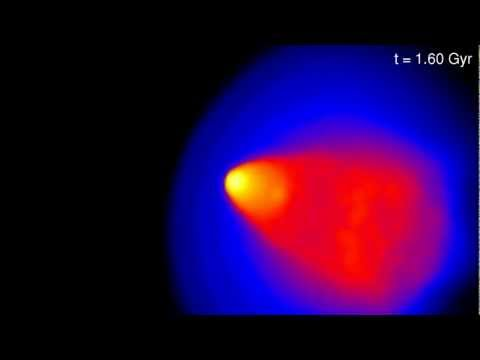

In [1]:
"""
First, lets look at the goal *_*

Here we are looking at an isolated binary merger of a cluster of galaxies, specifically Abell 3376.
Details of this YouTube video can be found in \citep{2013MNRAS.430.3249M}.

We are looking at the projected X-ray surface brightness, and at the end this is compared
to observations taken with XMM-Newton.

Initial conditions for the clusters are:
- a Hernquist (1990) DM profile, which is similar to the NFW-profile,
    but different mostly above the 'virial' radius r200
- a Beta-model (Cavaliere & Fusco-Femiano 1978) for the gas, where beta = 2/3
- hydrostatic equilibrium, spherical symmetry and the ideal gas law as EOS is assumed
"""

from IPython.display import YouTubeVideo
YouTubeVideo("XYyYIOwdVcw", width=1024, height=576)

In [2]:
%matplotlib inline

import numpy
from scipy.optimize import fsolve
from matplotlib import pyplot
pyplot.rcParams.update({'font.size': 22})

from amuse.units import units
from amuse.units import constants
from amuse.units.quantities import new_quantity
from amuse.units.quantities import VectorQuantity
from amuse.units import nbody_system
from amuse import datamodel

import amuse.plot as amuse_plot

def amuse_nth_root(quant, n):
    # Simply telling AMUSE quant**(1./3) breaks the units :-(
    return new_quantity((quant.number)**(1./n), (quant.unit ** (1./n)).to_simple_form())

% TODO: copy paste this into thesis and write this down such that I am satisfied with the phrasing.

Here we set up the initial conditions for an idealized isolated binary galaxy cluster merger
by following the 'cookbook' provided by \citep{2014MNRAS.438.1971D}. These initial conditions are used by \citep[][e.g.]{2013MNRAS.430.3249M, 2015MNRAS.451.3309M}. The individual clusters are created with both a gas and a dark matter component, but the formation of stars and cooling in the cluster are ignored. 

**Cluster and cosmological model**

The standard $\Lambda$CDM-cosmology is assumed, thus, here we adopt the typical values in standard $\Lambda$CDM-cosmology of a reduced Hubble constant $h = H_0/(100 \rm{\, km \, s}^{-1}\rm{\, Mpc}^{-1}) = 0.7, \Omega_M = 0.3$, and $\Omega_\Lambda = 0.7$. The critical density is given by $\rho_{c}(z) = 3 H(z)^2/(8 \pi G)$, where $G$ is the gravitational constant of Newton, and $H(z)$ is the Hubble constant as a function of redshift $z$ given by $H(z) = H_0 \sqrt{\Omega_M (1+z)^3 + \Omega_\Lambda}$. 

The clusters are set up by assuming a reasonable (= observationally obtained?) cluster mass $M_{200}$ such that the average density $\bar{\rho}(<r_{200}>) = 200 \rho_{\rm crit}$ yields a total mass of $M_{200}$ enclosed within the radius $r_{200}$, assuming spherical symmetry.


**Dark Matter**

The approach (first?) used by \citep{2005MNRAS.361..776S} is followed, where the density profile is given by \citet{1990ApJ...356..359H}. The Hernquist profile is similar to the widely adopted NFW-profile \citep{1996ApJ...462..563N}, but it mostly differs (= it does not converge) at radii larger than ten per cent of $r_{200}$.  Typically, the initial dark matter profile is set up by solving the hydrostatic equation numerically. The main advantage of the Hernquist profile is that it has an analytical solution making it relatively easy and fast even for high resolution simulations. Other dark matter profiles exist and differ mostly either within the core radius, or above the virial radius (? TODO: citation needed, provide examples?). TODO: mention that most profiles are the same (a nearly universal profile exists, theoretically unknown why, exact shape unkown (Mo, van den Bosch & White 2010)).

If one were to assume the same central density in the NFW-profile and the Hernquist profile, the NFW profile has a concentration parameter $c$ which corresponds to the Hernquist scalelength $a$ \citep{2005MNRAS.361..776S}, where

\begin{align}
c &= 5.74 \left( \frac{M_{200}}{2 \times 10^{12} h^{-1} M_\odot} \right)^{-0.097} \\
a &= r_s \sqrt{2 \ln(1+c) - c/(1+c)}
\end{align}

We then adopt the following radial density profile $\rho(r)$ and the cummulative mass profile $M_{\rm DM}(< r)$ where $r$ is the radius and $r_s = r_{200}/c$ from \citet{1990ApJ...356..359H}.
\begin{align}
\rho_{\rm DM} &= \frac{M_{\rm DM}}{2 \pi} \frac{a}{r(r+a)^3} \\
M_{\rm DM}(< r) &= M_{\rm DM} \frac{r^2}{(r+a)^2} \\
%\intertext{}
\rm{Now defining} \\
v_g &= \frac{GM_{\rm DM}}{a}, \quad q=\frac{-E}{v_g} \\
%\intertext{}
\rm{we adopt the analytical solution for the distribution function $f(E)$} \\
f(E) &= \frac{M_{\rm DM}}{8 \sqrt{2} \pi^3 a^3 v_g^3} (1-q^2)^{-5/2} \left[ 3 \sin^{-1}(q) + q(1-q^2)^{1/2}(1-2q^2)(8q^4-8q^2-3) \right],
\end{align}

where $E$ is the total specific energy, and $(0 \leq q \leq 1)$.

** It is unclear to me how to obtain $M_{\rm DM}$ from $M_{200}$ or vice versa without assuming values for both**.

Assuming both seems weird. The integral $\int_{r=0}^{r=r_{200}} M_{\rm DM}(<r) dr$ should yield $M_{200}$, but $r_{200}$ is calculated from $M_{200}$, so we get $M_{200} = M_{200}(M_{\rm DM})$.  Also $M_{\rm DM}(<r) \propto a^{-2}$, where $a=a(c)$ and $c=c(M_{200}) \Rightarrow M_{\rm DM}(<r) = M_{\rm DM}(M_{200})$


**Baryonic matter (gas)**

The gas is initially described by the equations of hydrostatic equilibrium following a $\beta$-model \citep{1978A&A....70..677C}, where $\beta = 2/3$ can be adopted \citep{2008MNRAS.389..967M}. The gas distribution is determined by the mass fraction, the dark matter distribution and the distribution of the entropy within the gas (Craig Sarazin, personal communication). A valid assumption is to assume the primordal mass fraction, for which a typical value could be 15%. See Planelles et al. 2013? \citet{2014MNRAS.438.1971D} assumes $b_f(r_{500}) \approx 0.14$, which corresponds to 0.17 within $r_{200}$.



** Characteristic pressure $P_{500}$**

\citep{2010A&A...517A..92A} gives a neat expression to obtain the value of $P_{500}$, which we adopt:
\begin{align}
P_{500} &= n_{e,500} k T_{500} = \frac{3}{8\pi} \left[ \frac{500 G^{-1/4} H(z)^2}{2} \right]^{4/3} \frac{\mu}{\mu_e} f_B M_{500}^{2/3},
\end{align}
The electron density is given by $n_{e,500} = \rho_{g,500}/(\mu_e m_p)$, where $\mu_e$ is the mean molecular weight per free electron, $f_B$ is the Universe baryon fraction. We adopt the values given by Nagai et al. (2007): $f_B = 0.175$, and $\mu_e = 1.14$.



In [3]:
class InitialCluster(object):
    """ Set up initial cluster of galaxies. Assume:
        - DM follows a Hernquist (1990) profile
        - Gas follows a beta-profile Cavaliere & Fusco-Femiano (1978)
        - Cluster is initially in hydrostatic equilibrium
    """    
    def __init__(self, M_200=units.MSun(1.5e15).as_quantity_in(units.kg),
                 M_dm=units.MSun(3.2e15).as_quantity_in(units.kg),
                 rho_0=(1e-26 | units.g/units.cm**3), z=0.87,
                 number_of_particles=1e4, random_state=None, random=None,
                 do_scale=False, convert_nbody=None,
                 disturbed_cluster=True, cool_core_cluster=False,
                 plot=True, do_print=True):
        """ Initialise gas, DM and TODO: relax cluster over several dynamical timescales """
        
        if not random_state == None:
            print "DO NOT USE RANDOM STATE"
        
        self.random_state = None
        
        if random is None:
            self.random = numpy.random
        else:
            self.random = random
            
        self.do_scale = do_scale
        self.convert_nbody = convert_nbody

        self.M_200 = M_200
        self.M_dm = M_dm
        # TODO: the current of rho_0 is bogus ?
        self.rho_0 = rho_0
        self.number_of_gas_particles = int(number_of_particles)/2
        self.number_of_dm_particles = int(number_of_particles)/2
            
        print "Initialising cluster with Ngas={0}, Ndm={1}"\
            .format(self.number_of_gas_particles, self.number_of_dm_particles)

        # Baryonic matter parameters
        # Mastropietro & Burkert 2008: "We assume mu = 0.6
        # for a gas of primordial composition, which appears to be a reasonable
        # approximation since the mean temperature of 1E0657-56 is T approx 14 keV
        # according to Markevitch (2006) and cooling is dominated by bremsstrahlung
        # and almost independent of the metallicity.
        self.mu = 0.6  # mean molecular weight

        # The following two values are adopted from Nagai et al. 2007
        # (but really, they are stolen from Arnaud et al. 2010)
        self.mu_e = 1.14  # mean molecular weight per free electron. 
        self.f_b = 0.175  # Universe baryon fraction.

        # Cosmological parameters
        # Reduced Hubble constant h = H0 / (100 km s−1 Mpc−1), here H0 = 70
        self.z = z
        self.h = 0.7
        self.Omega_M = 0.3
        self.Omega_Lambda = 0.7
        self.sigma_8 = 0.8  # no idea what this is...
        
        # Firstly we set up scaling parameters and characteristic parameters
        # Concentration parameter c, which varies with cluster mass (Duffy et al. 2008)
        self.c = 5.74 * (self.M_200 /
            (2e12 * self.h**-1 * units.MSun(1).as_quantity_in(units.kg)))**-0.097

        """ Consider a spherically symmetric cluster with mass M_200 with gas
        fraction b_f. Here, M_200 is the mass enclosed inside the radius
        r_200 so that the average density \\bar(rho)(<r_200>)=200*rho_crit.
        b_f(r_500) is set 0.14, which corresponds to b_f(r_200) = 0.17. """
        self.r_200 = self.find_characteristic_r(mass=self.M_200, rscale=200)
        self.r_s = (self.r_200/self.c).as_quantity_in(units.kpc)

        # Hernquist scalelength a, under the assumption of matching central densities
        # NB this value seems to differ in my calculations compared to Fig. 1 in Donnert 2014
        self.a = (self.r_s * numpy.sqrt(2*numpy.log(1+self.c) - self.c/(1+self.c))).as_quantity_in(units.kpc)

        self.r = VectorQuantity.arange(units.kpc(1), units.kpc(10000), units.parsec(100))

        self.set_up_dm_profile()
        self.set_up_baryonic_matter_profile(disturbed_cluster=disturbed_cluster,
                                            cool_core_cluster=cool_core_cluster)
        
        self.result()
        
        if do_print:
            print self
            for i in range(10):
                print "r =", self.r[i], "\trho_dm = {0:.3e}{1}".format(self.rho_dm[i].value_in(units.g / units.cm**3), "g/cm**3"),
                print "\tM_dm ={0:.3e}{1}".format(self.M_dm_below_r[i].value_in(units.MSun), "MSun")
                print "r =", self.r[i], "\trho_gas = {0:.3e}{1}".format(self.rho_gas[i].value_in(units.g / units.cm**3), "g/cm**3"),
                print "\tM_gas ={0:.3e}{1}".format(self.M_gas_below_r[i].value_in(units.MSun), "MSun"),
                print "\tT_r ={0:.3e}{1}".format(self.T_r[i].value_in(units.K), "K")
                
            print "Dark Matter particles"
            print self.dm
            print "Gas particles"
            print self.gas
        if plot:
            #self.plot_density_vs_r()
            #self.plot_mass_vs_r()
            self.plot_temperature_vs_r()

    def result(self):
        radius, theta, phi = self.new_positions_spherical_coordinates(gas_or_dm="dm")
        x,y,z =  self.coordinates_from_spherical(radius, theta, phi)
        dm_density = self.dm_density(radius)
        dm_mass = self.dm_cummulative_mass(radius)
        dm_temperature = self.dm_temperature(radius)
        dm_pressure = self.dm_pressure(radius)

        self.dm = datamodel.Particles(self.number_of_dm_particles)
        self.dm.x = x.as_quantity_in(units.kpc)
        self.dm.y = y.as_quantity_in(units.kpc)
        self.dm.z = z.as_quantity_in(units.kpc)
        self.dm.vx = 0.0 | units.ms
        self.dm.vy = 0.0 | units.ms
        self.dm.vz = 0.0 | units.ms
        self.dm.density = dm_density
        self.dm.mass = dm_mass
        self.dm.temperature = dm_temperature
        self.dm.pressure = dm_pressure
        self.dm.radius = 0 | nbody_system.length

        self.dm.move_to_center()

        radius, theta, phi = self.new_positions_spherical_coordinates(gas_or_dm="gas")
        x,y,z =  self.coordinates_from_spherical(radius, theta, phi)
        gas_density = self.gas_density(radius)
        gas_mass = self.gas_cummulative_mass(radius)
        gas_temperature = self.gas_temperature(radius)
        gas_pressure = self.gas_pressure(radius)
        
        self.gas = datamodel.Particles(self.number_of_gas_particles)
        self.gas.x = x.as_quantity_in(units.kpc)
        self.gas.y = y.as_quantity_in(units.kpc)
        self.gas.z = z.as_quantity_in(units.kpc)
        self.gas.vx = 0.0 | units.ms
        self.gas.vy = 0.0 | units.ms
        self.gas.vz = 0.0 | units.ms

        self.gas.density = gas_density
        self.gas.mass = gas_mass
        self.gas.temperature = gas_temperature
        self.gas.pressure = gas_pressure
        self.gas.radius = 0 | nbody_system.length

        self.gas.move_to_center()
        if self.do_scale:
            self.dm.scale_to_standard()
            self.gas.scale_to_standard()

        if not self.convert_nbody is None:
            self.gas = datamodel.ParticlesWithUnitsConverted(self.gas, self.convert_nbody.as_converter_from_si_to_generic())
            self.gas = self.gas.copy()
            self.dm = datamodel.ParticlesWithUnitsConverted(self.dm, self.convert_nbody.as_converter_from_si_to_generic())
            self.dm = self.dm.copy()
                
    def set_up_dm_profile(self, E=None):
        """ Set up Hernquist (1990) DM profile """

        self.rho_dm = self.dm_density(self.r)
        self.M_dm_below_r = self.dm_cummulative_mass(self.r)
        
        return

        # Hernquist (1990) equation 13
        # wops, this is kinetic energy, morron *_*...
        # temperature = constants.G * M_dm_below_r**2 / a * (r/a)**3 * numpy.log(a/r)
        # plot_temperature_vs_r(M_dm_below_r, r, r_200, r_500, a)

        # Now what is E? TODO: find out what E is (well, probably energy.. but how to obtain this?)
        # TODO: find out what to do with this f(E) and find plots to compare with?

        # - uniformly sample the cummulative mass function of DM and gas
        # - assign random directions to the position vectors to obtain Cartesian coordinates
        # - velocity of DM do not rely on Maxwellian approximation
        # - for velocity resort to distribution function f(E) by solving Eddington (1916) formula
        # - Von Neumann rejection: draw random pairs of f, E to obtain v^2
        # - have cluster relax in isolation few times dynamical timescale such that numerical transients can subside

        # Distribution Function f(E). Given by Hernquist (1990)
        v_g = numpy.sqrt(constants.G*self.M_dm/self.a)
        q = numpy.sqrt(-1.0 * E/v_g)  # 0 <= q <= 1
        f_of_E = self.M_dm / (8*numpy.sqrt(2) * numpy.pi**3 * self.a**3 * v_g**3) * (1 - q**2)**(-5./2)\
            * (3 * numpy.arcsin(q) + q*(1-q**2)**1./2 *(1-2*q**2)*(8*q**4-8*q**2-3))

    def set_up_baryonic_matter_profile(self, disturbed_cluster=True,
                                       cool_core_cluster=False):
        """ motivated from observations (e.g. Croston et al. 2008)
            the ICM is assumed to follow the well-known beta-model
            (Cavaliere & Fusco-Femiano 1978) """        
        if disturbed_cluster:
            self.r_c = (1./3 * self.r_s).as_quantity_in(units.kpc) 
        elif cool_core_cluster:
            self.r_c = (1./20 * self.r_s).as_quantity_in(units.kpc) 
        else:
            self.r_c = (1./2 * self.r_s).as_quantity_in(units.kpc)  # Ricker & Sarazin 2001

        self.rho_gas = self.gas_density(self.r)
        self.rho_dm_avg = self.average_dm_density(self.r)
        self.M_gas_below_r = self.gas_cummulative_mass(self.r) 
        self.T_r_gas = self.gas_temperature(self.r)
        self.T_r_dm = self.dm_temperature(self.r)
        self.T_r = self.T_r_gas + self.T_r_dm
        self.T_c = self.characteristic_temperature_analytically()
        self.P_gas = self.gas_pressure(self.r)
            
        # Pressure profile
        # Calculate average rho(r), then find r such that average rho equals 500*rho_crit
        
        self.r_500 = (fsolve(lambda r: self.average_dm_density(r | units.kpc).value_in(units.g/units.cm**3) 
            - (500*self.rho_crit).value_in(units.g/units.cm**3), 1)[0]) | units.kpc
        self.M_500 = self.dm_cummulative_mass(self.r_500)
        
        # Alternatively, if M_500 would have been known, then we would have been able to obtain r_500 from M_500
        # Mind you, now we calculate M_500 from r_500, so this will not work *_*...
        # self.r_500 = self.find_characteristic_r(mass=self.M_500, rscale=500)
        
        # TODO: find why there is a slight difference between these two numbers O_0
        # self.P_500 = self.find_p500_analytically()
        self.P_500 = self.gas_pressure(self.r_500) + self.dm_pressure(self.r_500)

        return

        # Bolometric luminosity in X-ray
        L_x = 2.2e-27 * self.r_c**3 * numpy.sqrt(self.T_c) * (rho_0 / (self.mu*constants.proton_mass))**2
  
    @property
    def rho_crit(self):
        """ Critical density of the Universe as a function of redshift """
        rho_crit = 3 * (70 | units.km / units.s / units.Mpc)**2 / (8 * numpy.pi * constants.G)
        return rho_crit.as_quantity_in(units.g/units.cm**3)

    @property
    def Hubble_of_z(self):
        """ Hubble constant as a function of redshift """
        units.H0 = units.named('H0', 'km/s/Mpc', (1 | units.km / units.s / units.Mpc).to_unit())
        H_0 = self.h * 100 | units.H0
        
        return H_0 * numpy.sqrt(self.Omega_M*(1+self.z)**3 + self.Omega_Lambda)
    
    def dm_density(self, r):
        """ Dark Matter density radial profile rho(r). Given by Hernquist (1990) """
        rho_dm = self.M_dm/(2*numpy.pi) * self.a / (r*(r + self.a)**3)
        return rho_dm.as_quantity_in(units.g/units.cm**3)

    def dm_cummulative_mass(self, r):
        """ Dark Matter cummulative mass profile M_DM(<r). Given by Hernquist (1990) """
        M_dm_below_r = self.M_dm * r**2 / (r + self.a)**2
        return M_dm_below_r.as_quantity_in(units.MSun)
    
    def average_dm_density(self, r):
        rho_average = (self.dm_cummulative_mass(r) / (4./3*numpy.pi*r**3))
        return rho_average.as_quantity_in(units.g/units.cm**3)

    def gas_density(self, r):
        # Gas profile
        # "Should any other value of beta be used, this step would involve the confluent
        # hypergeometric function, which usually makes the analytical solution of the
        # hydrostatic equation impossible. Another elegant solution would be beta=1,
        # which however is unfavoured from observations" - Donnert in MNRAS 438 2014
        self.beta = 2./3  # Mastropietro & Burkert (2008)
        rho_gas = self.rho_0 * (1 + r**2/self.r_c**2)**(-3*self.beta/2.)
        return rho_gas.as_quantity_in(units.g/units.cm**3)
        
    def gas_cummulative_mass(self, r):
        M_gas_below_r = 4*numpy.pi*self.r_c**3*self.rho_0 * (r/self.r_c - numpy.arctan(r/self.r_c))
        return M_gas_below_r.as_quantity_in(units.MSun)
    
    def gas_temperature(self, r):           
        F_1 = numpy.pi**2/(8*self.r_c) - numpy.arctan(r/self.r_c)**2/(2*self.r_c) -\
            numpy.arctan(r/self.r_c)/r

        T_r_gas = constants.G*self.mu*constants.proton_mass/constants.kB *\
            (1 + r**2/self.r_c**2) * (4*numpy.pi*self.r_c**3*self.rho_0*F_1)
        return T_r_gas.as_quantity_in(units.K)

    def dm_temperature(self, r):
        F_0 = self.r_c/(self.a**2 + self.r_c**2)**2 * (numpy.pi/2*(self.a**2 - self.r_c**2) +\
            self.r_c*(self.a**2 + self.r_c**2)/(self.a + r) - (self.a**2 - self.r_c**2)*\
            numpy.arctan(r/self.r_c) - self.r_c*self.a*numpy.log((self.a + r)**2/(r**2 + self.r_c**2)))
        T_r_dm = constants.G*self.mu*constants.proton_mass/constants.kB * (1 + r**2/self.r_c**2) *\
            (self.M_dm*F_0)
        return T_r_dm.as_quantity_in(units.K)
    
    def temperature(self, r):
        return (self.gas_temperature(r) + self.dm_temperature(r)).as_quantity_in(units.K)
    
    def characteristic_temperature_analytically(self):
        # Charecteristic temperature
        T_c = 2*constants.G*self.mu*constants.proton_mass/constants.kB * \
            (self.M_dm * self.r_c**2/(self.a**2 + self.r_c**2)**2 * (numpy.pi/(4*self.r_c) * \
            (self.a**2 - self.r_c**2) + (self.a**2 + self.r_c**2)/(self.a + self.r_c) - \
            self.a*numpy.log((self.a + self.r_c)**2/(2*self.r_c**2))) \
            + numpy.pi**2*self.r_c**2*self.rho_0*(3*numpy.pi/8 - 1))
        return T_c.as_quantity_in(units.K)
        
    def gas_pressure(self, r):
        P_gas = constants.kB*self.temperature(r)*self.gas_density(r)/\
            (self.mu*constants.proton_mass)
        return P_gas.as_quantity_in(units.Pa)
    
    def dm_pressure(self, r):
        P_dm = constants.kB*self.temperature(r)*self.dm_density(r)/\
            (self.mu*constants.proton_mass)
        return P_dm.as_quantity_in(units.Pa)

    def find_characteristic_r(self, mass=None, rscale=200):
        """ We assume a spherically symmetric ball of gas/dark matter """
        if not mass:
            print "Assuming r_200 should be found "
            mass = self.M_200
        r_cubed = (0.75/numpy.pi * mass/(rscale*self.rho_crit))
        return amuse_nth_root(r_cubed, 3).as_quantity_in(units.kpc)

    def find_p500_analytically(self):      
        """ Calculate characteristic pressure at r_500 using 
        the analytical formula given by Arnaud et al. (2010) in Appendix A """
        P_500 = 3/(8*numpy.pi) * ((500./2)*constants.G**(-1./4)*self.Hubble_of_z**2)**(4./3) *\
            self.mu/self.mu_e * self.f_b * self.M_500**(2./3)

        return P_500.as_quantity_in(units.Pa)

    def calculate_radius_uniform_distribution(self, gas_or_dm):
        """" Sample radius from the mass profile M(r) """
        if gas_or_dm == "dm":
            # The Hernquist profile is easily invertible, so the mass profile can be sampled via
            # q = M_dm_below_r/M_dm => r = a*sqrt(q)/(1-sqrt(q)), for random q: 0 <= q <= 1
            q = self.random.uniform(0, 1, self.number_of_dm_particles)
            radius = self.a*numpy.sqrt(q) / (1 - numpy.sqrt(q))
            return radius
        elif gas_or_dm == "gas":
            # TODO: this makes little to no sense?
            Rmax = 3.75 * self.r_200 / 2
            radius = Rmax * self.random.uniform(0, 1, self.number_of_gas_particles)
            # The mass profile for the gas is not easily invertible, so sample the gas
            # mass by numerically inverting it trough a table.
            # self.cluster.M_gas_below_r ?
            # self.cluster.gas_cummulative_mass(r)
            #  //  Choose radius randomly from the mass distribution.
            # rno = self.random.uniform(0, 1, (self.number_of_gas_particles, 1))
            return radius
        else:
            print "Incorrect usage of calculate_radius_uniform_distribution."
            print "Please specify gas_or_dm = 'gas' or 'dm'."
            return None

    def new_positions_spherical_coordinates(self, gas_or_dm=None):
        if gas_or_dm == "dm":
            number_of_particles = self.number_of_dm_particles
        elif gas_or_dm == "gas":
            number_of_particles = self.number_of_gas_particles
        else:
            print "Incorrect usage of new_positions_spherical_coordinates."
            print "Please specify gas_or_dm = 'gas' or 'dm'."
            return None
        pi2 = numpy.pi * 2
        radius = self.calculate_radius_uniform_distribution(gas_or_dm)
        theta = numpy.arccos(self.random.uniform(-1.0, 1.0, number_of_particles))
        phi = self.random.uniform(0.0, pi2, number_of_particles)
        return (radius,theta,phi)
    
    def coordinates_from_spherical(self, radius, theta, phi):
        x = radius * numpy.sin( theta ) * numpy.cos( phi )
        y = radius * numpy.sin( theta ) * numpy.sin( phi )
        z = radius * numpy.cos( theta )
        return (x,y,z)
    
    def radius_from_carthesian(self, x, y, z):
        return amuse_nth_root((x**2, y**2, z**2), 2).as_quantity_in(units.kpc)

    def find_characteristic_value(self, attr, trait):
        """ Find a characteristic value, e.g. T_c = T(r_c)
        
            @param attr: string containing which attribute should be searched, e.g. T_c
            @param trait: string containing which characteristic value, e.g. r_c 
            
            NB this function is not very fast as it iterates trough a numpy array *_*
        """
        if type(attr) is not str or type(trait) is not str:
            print "Incorrect use"
            return None
        attr = getattr(self, attr)
        trait = getattr(self, trait)
        if "local_unit" in dir(attr.unit):
            value = (attr[(numpy.abs(self.r-trait)).argmin()]).value_in(attr.unit.local_unit)
            unit = attr.unit.local_unit
        else:
            value = (attr[(numpy.abs(self.r-trait)).argmin()]).value_in(attr.unit)
            unit = attr.unit

        return new_quantity(value, unit)

    def print_characteristic_value(self, attr, trait):
        quant = self.find_characteristic_value(attr, trait)
        print "{0:.3e} {1}".format(quant.number, quant.unit)

    def plot_density_vs_r(self):
        fig = pyplot.figure(figsize=(12, 9))
        ax = pyplot.gca()

        amuse_plot.loglog(self.r, self.rho_dm.as_quantity_in(units.g / units.cm**3))
        amuse_plot.ylabel(r'$\rho$')
        amuse_plot.xlabel(r'$r$')

        ax.set_xticks((10, 100, 1000))
        ax.set_xticklabels(("10", "100", "1000"))
        ax.set_xlim(xmin=10, xmax=5000)
        ax.set_ylim(ymin=1e-28, ymax=1e-23)

        pyplot.axvline(x=self.r_200.value_in(units.kpc), lw=2, c='k')
        pyplot.text(self.r_200.value_in(units.kpc)+100, 7e-24, r'$r_{200}$')
        pyplot.axvline(x=self.r_500.value_in(units.kpc), lw=2, c='k')
        pyplot.text(self.r_500.value_in(units.kpc)-500, 7e-24, r'$r_{500}$')
        pyplot.axvline(x=self.a.value_in(units.kpc), lw=2, c='k')
        pyplot.text(self.a.value_in(units.kpc)+70, 5e-24, r'$a_{\rm Hernq}$')

    def plot_mass_vs_r(self):
        fig = pyplot.figure(figsize=(12, 9))
        ax = pyplot.gca()

        amuse_plot.loglog(self.r, self.M_dm_below_r.as_quantity_in(units.MSun))
        amuse_plot.ylabel(r'$M(<r)$')
        amuse_plot.xlabel(r'$r$')

        ax.set_xticks((10, 100, 1000))
        ax.set_xticklabels(("10", "100", "1000"))
        ax.set_xlim(xmin=10, xmax=5000)
        ax.set_ylim(ymin=1e10, ymax=5e15)

        pyplot.axvline(x=self.r_200.value_in(units.kpc), lw=2, c='k')
        pyplot.text(self.r_200.value_in(units.kpc)+100, 3e15, r'$r_{200}$')
        pyplot.axvline(x=self.r_500.value_in(units.kpc), lw=2, c='k')
        pyplot.text(self.r_500.value_in(units.kpc)-500, 3e15, r'$r_{500}$')
        pyplot.axvline(x=self.a.value_in(units.kpc), lw=2, c='k')
        pyplot.text(self.a.value_in(units.kpc)+70, 2e15, r'$a_{\rm Hernq}$')

    def plot_temperature_vs_r(self):
        fig = pyplot.figure(figsize=(12, 9))
        ax = pyplot.gca()

        amuse_plot.loglog(self.r, self.T_r.as_quantity_in(units.K))
        amuse_plot.loglog(self.r, self.T_r_dm.as_quantity_in(units.K),
                          c="k", ls="dashed", label="from DM, disturbed")
        amuse_plot.loglog(self.r, self.T_r_gas.as_quantity_in(units.K),
                          c="k", ls="dashdot", label="from Gas, disturbed")
        amuse_plot.ylabel(r'$T$')
        amuse_plot.xlabel(r'$r$')

        ax.set_xticks((10, 100, 1000))
        ax.set_xticklabels(("10", "100", "1000"))
        ax.set_xlim(xmin=10, xmax=5000)
        # ax.set_ylim(ymin=6e6, ymax=3e8)

        pyplot.axvline(x=self.r_200.value_in(units.kpc), lw=2, c='k')
        pyplot.text(self.r_200.value_in(units.kpc), 0.9e8, r'$r_{200}$', fontsize=12)
        pyplot.axvline(x=self.r_500.value_in(units.kpc), lw=2, c='k')
        pyplot.text(self.r_500.value_in(units.kpc), 0.9e8, r'$r_{500}$', fontsize=12)

        # a_hernq
        intersect = self.T_r[(numpy.abs(self.r-self.a)).argmin()]
        pyplot.axvline(x=self.a.value_in(units.kpc), lw=2, c='k')
        pyplot.text(self.a.value_in(units.kpc), 0.7e8, r'$a_{\rm Hernq}$', fontsize=12)

        # r_core,dist
        intersect = self.T_r[(numpy.abs(self.r-self.r_c)).argmin()]
        ymin, ymax = fig.gca().get_ylim()
        ymin = (numpy.log(intersect.value_in(units.K)/ymin)) / (numpy.log(ymax/ymin))
        pyplot.axvline(x=self.r_c.value_in(units.kpc), ymin=ymin, ymax=1, lw=2, ls='--', c='k')
        pyplot.text(self.r_c.value_in(units.kpc), 0.7e8, r'$r_{\rm core}$', fontsize=12)
        
        pyplot.legend(loc=3, frameon=False, fontsize=12)

    def __str__(self, compare=False):
        tmp = "c = " + str(self.c) + "\n"
        tmp += "r_200 = " + str(self.r_200) + "\n"
        tmp += "a = " + str(self.a) + "\n"
        tmp += "r_s = " + str(self.r_s) + "\n"
        tmp += "r_c = " + str(self.r_c) + "\n"
        tmp += "\n"
        tmp += "T_c (analytically) = " + str(self.T_c) + "\n"
        if compare:
            tmp += "T_c = T_r(r_c) = " + str(self.temperature(self.r_c)) + "\n"
        tmp += "r_500 (fsolve) = " + str(self.r_500) + "\n"
        if compare:
            tmp += "r_500 = r(rhobar=500*rho_c) = " + str(self.r[(numpy.abs(self.rho_dm_avg-500*self.rho_crit)).argmin()]) + "\n"
        tmp += "M_500 = M_DM(r_500) = " + str(self.M_500) + "\n"
        tmp += "P_500 = " + str(self.P_500) + "\n"
        if compare:
            tmp += "P_500 = P_gas(r_500) + P_dm(r_500) = " + str(self.gas_pressure(self.r_500) + self.dm_pressure(self.r_500)) + "\n"

        return tmp

In [4]:
ClusterA = InitialCluster(do_print=False, plot=False, number_of_particles=1e4)

Initialising cluster with Ngas=5000, Ndm=5000


In [5]:
print ClusterA.r_c

251.774125191 kpc


In [5]:
from amuse.io import write_set_to_file
write_set_to_file(ClusterA.dm, 'ClusterA_dm', 'amuse')
write_set_to_file(ClusterA.gas, 'ClusterA_gas', 'amuse')

In [6]:
from amuse.ext.evrard_test import uniform_unit_sphere
from amuse.units import nbody_system
from amuse import datamodel
    
def result():
    N = 1000
    N_dm = N/2
    N_gas = N/2
    
    cluster = InitialCluster(do_print=False, plot=False)
    
    # q = numpy.random.uniform(0, 1, N_dm)
    # q = cluster.M_dm_below_r / cluster.M_dm
    # r = cluster.a * numpy.sqrt(q) / (1-numpy.sqrt(q))
    
    # amuse_plot.plot(r.as_quantity_in(units.kpc))
    
    return
    base_sphere = uniform_unit_sphere(N_gas, base_grid=None) 
    x, y, z = base_sphere.make_xyz()
    pyplot.figure(figsize=(10,10))
    amuse_plot.scatter(x, y)
    actualN=len(x)
    
    pyplot.figure()
    r=numpy.sqrt(x**2+y**2+z**2)
    pyplot.plot(r)

    result = datamodel.Particles(actualN)
    result.mass = nbody_system.mass.new_quantity(mass)
    result.x = nbody_system.length.new_quantity(x)
    result.y = nbody_system.length.new_quantity(y)
    result.z = nbody_system.length.new_quantity(z)
    result.vx = nbody_system.speed.new_quantity(vx)
    result.vy = nbody_system.speed.new_quantity(vy)
    result.vz = nbody_system.speed.new_quantity(vz)
    result.u = (nbody_system.speed**2).new_quantity(u)

    result.move_to_center()
    if do_scale:
        potential_energy = result.potential_energy(G = nbody_system.G)
        result.position *= potential_energy / (-0.5 | nbody_system.energy)

        internal_energy = result.thermal_energy()
        result.u *= ((0.25 | nbody_system.energy) / internal_energy)

    if not convert_nbody is None:
        result = datamodel.ParticlesWithUnitsConverted(result, convert_nbody.as_converter_from_si_to_generic())
        result = result.copy()

    return result
result()

Initialising cluster with Ngas=5000, Ndm=5000


4.60195075217e-27
2361.0 kpc
2361.50456987 kpc


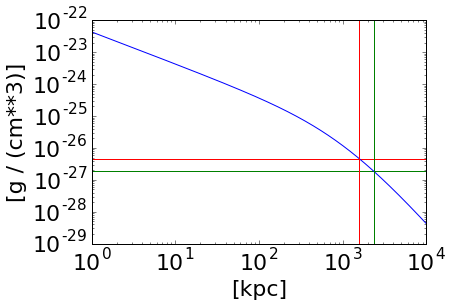

In [7]:
rho_average = (ClusterA.M_dm_below_r / (4./3*numpy.pi*ClusterA.r**3)).as_quantity_in(units.g/units.cm**3)
print 500*ClusterA.rho_crit.value_in(units.g/units.cm**3)
pyplot.axhline(200*ClusterA.rho_crit.value_in(units.g/units.cm**3), c="g")
pyplot.axhline(500*ClusterA.rho_crit.value_in(units.g/units.cm**3), c="r")
amuse_plot.loglog(ClusterA.r, rho_average)

r_500 = ClusterA.r[(numpy.abs(rho_average-500*ClusterA.rho_crit)).argmin()]
r_200 = ClusterA.r[(numpy.abs(rho_average-200*ClusterA.rho_crit)).argmin()]
pyplot.axvline(r_500.value_in(units.kpc), c="r")
pyplot.axvline(r_200.value_in(units.kpc), c="g")
print r_200
print ClusterA.r_200

In [8]:
ClusterA.P_500

quantity<2.291850526e-12 Pa>

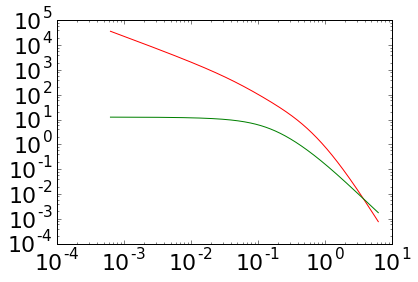

In [9]:
P_dm = constants.kB*ClusterA.T_r*ClusterA.rho_dm/(ClusterA.mu*constants.proton_mass)
P_gas = constants.kB*ClusterA.T_r*ClusterA.rho_gas/(ClusterA.mu*constants.proton_mass)
amuse_plot.loglog(ClusterA.r/ClusterA.r_500, P_dm/ClusterA.P_500, c="r")
amuse_plot.loglog(ClusterA.r/ClusterA.r_500, P_gas/ClusterA.P_500, c="g")  # this seems kinda correct

In [10]:
# Well, here we can create a bunch of f(E) values... ?

vg = numpy.sqrt(constants.G * ClusterA.M_dm/ClusterA.a)
print vg.as_quantity_in(units.m/units.s)
q = VectorQuantity.arange(0, 1, 0.001) | (units.kg*units.m/units.s)**(1./2)
E = - q**2 * vg
E[0:10].as_quantity_in(units.erg)

3556111.72105 m / s


quantity<[-0.0, -35561117.2105, -142244468.842, -320050054.894, -568977875.367, -889027930.262, -1280200219.58, -1742494743.31, -2275911501.47, -2880450494.05] erg>

In [11]:
def donnert_subplots(slow=False, analytical_P500=False):
    # Well, I will just eyeball the value of rho_0 in Figure 1 in Donnert (2014) and adopt this value, I suppose...
    disturbed = InitialCluster(rho_0=(9e-27 | units.g/units.cm**3), 
                               plot=False, do_print=False, 
                               disturbed_cluster=True, cool_core_cluster=False)
    coolcore = InitialCluster(rho_0=(3e-25 | units.g/units.cm**3), 
                              plot=False, do_print=False,
                              disturbed_cluster=False, cool_core_cluster=True)
    # rickersarazin = InitialCluster(plot=False, do_print=False, disturbed_cluster=False, cool_core_cluster=False)
    
    fig, ((ax1, ax2), (ax3, ax4)) = pyplot.subplots(2, 2, figsize=(20, 20), dpi=500)
    
    # Plot the density situation
    pyplot.sca(ax1)
    amuse_plot.loglog(coolcore.r, coolcore.rho_gas.as_quantity_in(units.g / units.cm**3),
                      c='k', ls='dotted', label="Gas, cool core")
    amuse_plot.loglog(disturbed.r, disturbed.rho_gas.as_quantity_in(units.g / units.cm**3),
                      c='k', ls='dashed', label="Gas, disturbed")
    amuse_plot.loglog(disturbed.r, disturbed.rho_dm.as_quantity_in(units.g / units.cm**3),
                      c='k', ls='solid', label="Dark Matter")
    amuse_plot.ylabel(r'$\rho$')
    amuse_plot.xlabel(r'$r$')
    pyplot.legend(loc=3, frameon=False, fontsize=12)
    
    ax1.set_ylim(ymin=1e-28, ymax=1e-23)

    pyplot.axvline(x=disturbed.r_200.value_in(units.kpc), lw=2, c='k')
    pyplot.text(disturbed.r_200.value_in(units.kpc), 7e-24, r'$r_{200}$', fontsize=12)
    pyplot.axvline(x=disturbed.r_500.value_in(units.kpc), lw=2, c='k')
    pyplot.text(disturbed.r_500.value_in(units.kpc), 7e-24, r'$r_{500}$', fontsize=12)
    
    # a_hernq
    if slow:
        intersect = disturbed.rho_dm[(numpy.abs(disturbed.r-disturbed.a)).argmin()]
    else:
        intersect = disturbed.dm_density(disturbed.a)
    ymin, ymax = ax1.get_ylim()
    ymin = (numpy.log(intersect.value_in(units.g/units.cm**3)/ymin)) / (numpy.log(ymax/ymin))
    pyplot.axvline(x=disturbed.a.value_in(units.kpc), ymin=ymin, ymax=1, lw=2, c='k')
    pyplot.text(disturbed.a.value_in(units.kpc), 5e-24, r'$a_{\rm Hernq}$', fontsize=12)
    
    # r_core,dist
    if slow:
        intersect = disturbed.rho_gas[(numpy.abs(disturbed.r-disturbed.r_c)).argmin()]
    else:
        intersect = disturbed.gas_density(disturbed.r_c)
    ymin, ymax = ax1.get_ylim()
    ymin = (numpy.log(intersect.value_in(units.g/units.cm**3)/ymin)) / (numpy.log(ymax/ymin))
    pyplot.axvline(x=disturbed.r_c.value_in(units.kpc), ymin=ymin, ymax=1, lw=2, ls='--', c='k')
    pyplot.text(disturbed.r_c.value_in(units.kpc), 5e-24, r'$r_{\rm core,dist}$', fontsize=12)

    # r_core,cc
    if slow:
        intersect = coolcore.rho_gas[(numpy.abs(coolcore.r-coolcore.r_c)).argmin()]
    else:
        intersect = coolcore.gas_density(coolcore.r_c)
    ymin, ymax = ax1.get_ylim()
    ymin = (numpy.log(intersect.value_in(units.g/units.cm**3)/ymin)) / (numpy.log(ymax/ymin))
    pyplot.axvline(x=coolcore.r_c.value_in(units.kpc), ymin=ymin, ymax=1, lw=2, ls=':', c='k')
    pyplot.text(coolcore.r_c.value_in(units.kpc), 5e-24, r'$r_{\rm core,cc}$', fontsize=12)
    
    # Plot the mass situation
    pyplot.sca(ax2)
    amuse_plot.loglog(coolcore.r, coolcore.M_gas_below_r.as_quantity_in(units.MSun),
                      c='k', ls='dotted', label="Gas, cool core")
    amuse_plot.loglog(disturbed.r, disturbed.M_gas_below_r.as_quantity_in(units.MSun),
                      c='k', ls='dashed', label="Gas, disturbed")
    amuse_plot.loglog(disturbed.r, disturbed.M_dm_below_r.as_quantity_in(units.MSun),
                      c='k', ls='solid', label="Dark Matter")
    amuse_plot.ylabel(r'$M(<r)$')
    amuse_plot.xlabel(r'$r$')
    pyplot.legend(loc=8, frameon=False, fontsize=12)
    
    ax2.set_ylim(ymin=1e10, ymax=5e15)

    pyplot.axvline(x=disturbed.r_200.value_in(units.kpc), lw=2, c='k')
    pyplot.text(disturbed.r_200.value_in(units.kpc), 3e15, r'$r_{200}$', fontsize=12)
    pyplot.axvline(x=disturbed.r_500.value_in(units.kpc), lw=2, c='k')
    pyplot.text(disturbed.r_500.value_in(units.kpc), 3e15, r'$r_{500}$', fontsize=12)
    
    # a_hernq
    if slow:
        intersect = disturbed.M_dm_below_r[(numpy.abs(disturbed.r-disturbed.a)).argmin()]
    else:
        intersect = disturbed.dm_cummulative_mass(disturbed.a)
    ymin, ymax = ax2.get_ylim()
    ymin = (numpy.log(intersect.value_in(units.MSun)/ymin)) / (numpy.log(ymax/ymin))
    pyplot.axvline(x=disturbed.a.value_in(units.kpc), ymin=ymin, ymax=1, lw=2, c='k')
    pyplot.text(disturbed.a.value_in(units.kpc), 2e15, r'$a_{\rm Hernq}$', fontsize=12)
    
    # r_core,dist
    if slow:
        intersect = disturbed.M_dm_below_r[(numpy.abs(disturbed.r-disturbed.r_c)).argmin()]
    else:
        intersect = disturbed.dm_cummulative_mass(disturbed.r_c)
    ymin, ymax = ax2.get_ylim()
    ymin = (numpy.log(intersect.value_in(units.MSun)/ymin)) / (numpy.log(ymax/ymin))
    pyplot.axvline(x=disturbed.r_c.value_in(units.kpc), ymin=ymin, ymax=1, lw=2, ls='--', c='k')
    pyplot.text(disturbed.r_c.value_in(units.kpc), 2e15, r'$r_{\rm core,dist}$', fontsize=12)
    
    # r_core,cc
    if slow:
        intersect = coolcore.M_gas_below_r[(numpy.abs(coolcore.r-coolcore.r_c)).argmin()]
    else:
        intersect = coolcore.dm_cummulative_mass(coolcore.r_c)
    ymin, ymax = ax2.get_ylim()
    ymin = (numpy.log(intersect.value_in(units.MSun)/ymin)) / (numpy.log(ymax/ymin))
    pyplot.axvline(x=coolcore.r_c.value_in(units.kpc), ymin=ymin, ymax=1, lw=2, ls=':', c='k')
    pyplot.text(coolcore.r_c.value_in(units.kpc), 2e15, r'$r_{\rm core,cc}$', fontsize=12)
    
    # Plot the temperature situation
    pyplot.sca(ax3)
    amuse_plot.loglog(disturbed.r, disturbed.T_r.as_quantity_in(units.K),
                      c='k', ls='solid', label="disturbed")
    amuse_plot.loglog(disturbed.r, disturbed.T_r_dm.as_quantity_in(units.K),
                      c='k', ls='dashdot', label="from DM, disturbed")
    amuse_plot.loglog(disturbed.r, disturbed.T_r_gas.as_quantity_in(units.K),
                      c='k', ls='dashed', label="from Gas, disturbed")
    amuse_plot.loglog(coolcore.r, coolcore.T_r.as_quantity_in(units.K),
                      c='k', ls='dotted', label="cool core")
    amuse_plot.ylabel(r'$T$')
    amuse_plot.xlabel(r'$r$')
    pyplot.legend(loc=10, frameon=False, fontsize=12)

    ax3.set_ylim(ymin=6e6, ymax=3e8)

    pyplot.axvline(x=disturbed.r_200.value_in(units.kpc), lw=2, c='k')
    pyplot.text(disturbed.r_200.value_in(units.kpc), 2.6e8, r'$r_{200}$', fontsize=12)
    pyplot.axvline(x=disturbed.r_500.value_in(units.kpc), lw=2, c='k')
    pyplot.text(disturbed.r_500.value_in(units.kpc), 2.6e8, r'$r_{500}$', fontsize=12)
    
    pyplot.axvline(x=disturbed.a.value_in(units.kpc), lw=2, c='k')
    pyplot.text(disturbed.a.value_in(units.kpc), 2.4e8, r'$a_{\rm Hernq}$', fontsize=12)
    
    # r_core,dist
    if slow:
        intersect = disturbed.T_r[(numpy.abs(disturbed.r-disturbed.r_c)).argmin()]
    else:
        intersect = disturbed.temperature(disturbed.r_c)
    ymin, ymax = ax3.get_ylim()
    ymin = (numpy.log(intersect.value_in(units.K)/ymin)) / (numpy.log(ymax/ymin))
    pyplot.axvline(x=disturbed.r_c.value_in(units.kpc), ymin=ymin, ymax=1, lw=2, ls='--', c='k')
    pyplot.text(disturbed.r_c.value_in(units.kpc), 2.4e8, r'$r_{\rm core,dist}$', fontsize=12)
    
    # r_core,cc
    if slow:
        intersect = coolcore.T_r[(numpy.abs(coolcore.r-coolcore.r_c)).argmin()]
    else:
        intersect = coolcore.temperature(coolcore.r_c)
    ymin, ymax = ax3.get_ylim()
    ymin = (numpy.log(intersect.value_in(units.K)/ymin)) / (numpy.log(ymax/ymin))
    pyplot.axvline(x=coolcore.r_c.value_in(units.kpc), ymin=ymin, ymax=1, lw=2, ls=':', c='k')
    pyplot.text(coolcore.r_c.value_in(units.kpc), 2.4e8, r'$r_{\rm core,cc}$', fontsize=12)
    
    # TODO: pressure situation    
    pyplot.sca(ax4)
    colours=[(255./255, 127./255, 0./255),
             (152./255, 78./255, 163./255),
             (77./255, 175./255, 74./255),
             (52./255, 126./255, 184./255),
             (228./255, 26./255, 28./255)]

    print "Warning, the pressure plots make little sense because for each M_DM is the same but M_200 differs" 
    for i, M_200 in enumerate(VectorQuantity([3e15, 1.5e15, 1e15, 0.5e15, 0.1e15], units.MSun)):
        disturbed = InitialCluster(rho_0=(9e-27 | units.g/units.cm**3), M_200=M_200,
                                   plot=False, do_print=False, 
                                   disturbed_cluster=True, cool_core_cluster=False)
        coolcore = InitialCluster(rho_0=(3e-25 | units.g/units.cm**3), M_200=M_200,
                                  plot=False, do_print=False,
                                  disturbed_cluster=False, cool_core_cluster=True)
        if analytical_P500:
            amuse_plot.loglog(disturbed.r/disturbed.r_500, (disturbed.P_gas/disturbed.find_p500_analytically()),
                              c=colours[i], ls='solid', label=r'{0} $M_\odot$'.format(disturbed.M_200.value_in(units.MSun)))
            amuse_plot.loglog(coolcore.r/coolcore.r_500, (coolcore.P_gas/coolcore.find_p500_analytically()),
                              c=colours[i], ls='dashed')
        else:
            amuse_plot.loglog(disturbed.r/disturbed.r_500, (disturbed.P_gas/disturbed.P_500),
                              c=colours[i], ls='solid', label=r'{0} $M_\odot$'.format(disturbed.M_200.value_in(units.MSun)))
            amuse_plot.loglog(coolcore.r/coolcore.r_500, (coolcore.P_gas/coolcore.P_500),
                              c=colours[i], ls='dashed')

    amuse_plot.ylabel(r'$P(r)/P_{500}$')
    amuse_plot.xlabel(r'$r/r_{500}$')
    legend = pyplot.legend(loc=3, frameon=False, fontsize=16)
    # Set the color situation
    for colour, text in zip(colours, legend.get_texts()):
        text.set_color(colour)
    
    ax4.set_ylim(ymin=1e-2, ymax=1e3)
    ax4.set_xticks((0.01, 0.10, 1.00))
    ax4.set_xticklabels(("0.01", "0.10", "1.00"))
    ax4.set_xlim(xmin=0.01, xmax=2.0)
    ax4.minorticks_on()
    ax4.tick_params('both', length=10, width=2, which='major')
    ax4.tick_params('both', length=5, width=1, which='minor')
    ax4.text(0.015, 4, "disturbed", color="grey", fontsize=15)
    ax4.text(0.02, 110, "cool cores", color="grey", fontsize=15)
    ax4.text(0.2, 50, "Arnaud et al. 2010", color="black", fontsize=15)

    # Set the xticks situation
    for ax in [ax1, ax2, ax3]:
        ax.set_xticks((10, 100, 1000))
        ax.set_xticklabels(("10", "100", "1000"))
        ax.set_xlim(xmin=10, xmax=5000)
        ax.minorticks_on()
        ax.tick_params('both', length=10, width=2, which='major')
        ax.tick_params('both', length=5, width=1, which='minor')
        
    pyplot.savefig("Donnert2014_Figure1_by_TLRH.pdf", format="pdf", dpi=1000)

Initialising cluster with Ngas=5000, Ndm=5000
Initialising cluster with Ngas=5000, Ndm=5000
Warning, the pressure plots make little sense because for each M_DM is the same but M_200 differs
Initialising cluster with Ngas=5000, Ndm=5000
Initialising cluster with Ngas=5000, Ndm=5000
Initialising cluster with Ngas=5000, Ndm=5000
Initialising cluster with Ngas=5000, Ndm=5000
Initialising cluster with Ngas=5000, Ndm=5000
Initialising cluster with Ngas=5000, Ndm=5000
Initialising cluster with Ngas=5000, Ndm=5000
Initialising cluster with Ngas=5000, Ndm=5000
Initialising cluster with Ngas=5000, Ndm=5000
Initialising cluster with Ngas=5000, Ndm=5000
Initialising cluster with Ngas=5000, Ndm=5000
Initialising cluster with Ngas=5000, Ndm=5000
Warning, the pressure plots make little sense because for each M_DM is the same but M_200 differs
Initialising cluster with Ngas=5000, Ndm=5000
Initialising cluster with Ngas=5000, Ndm=5000
Initialising cluster with Ngas=5000, Ndm=5000
Initialising cluster w

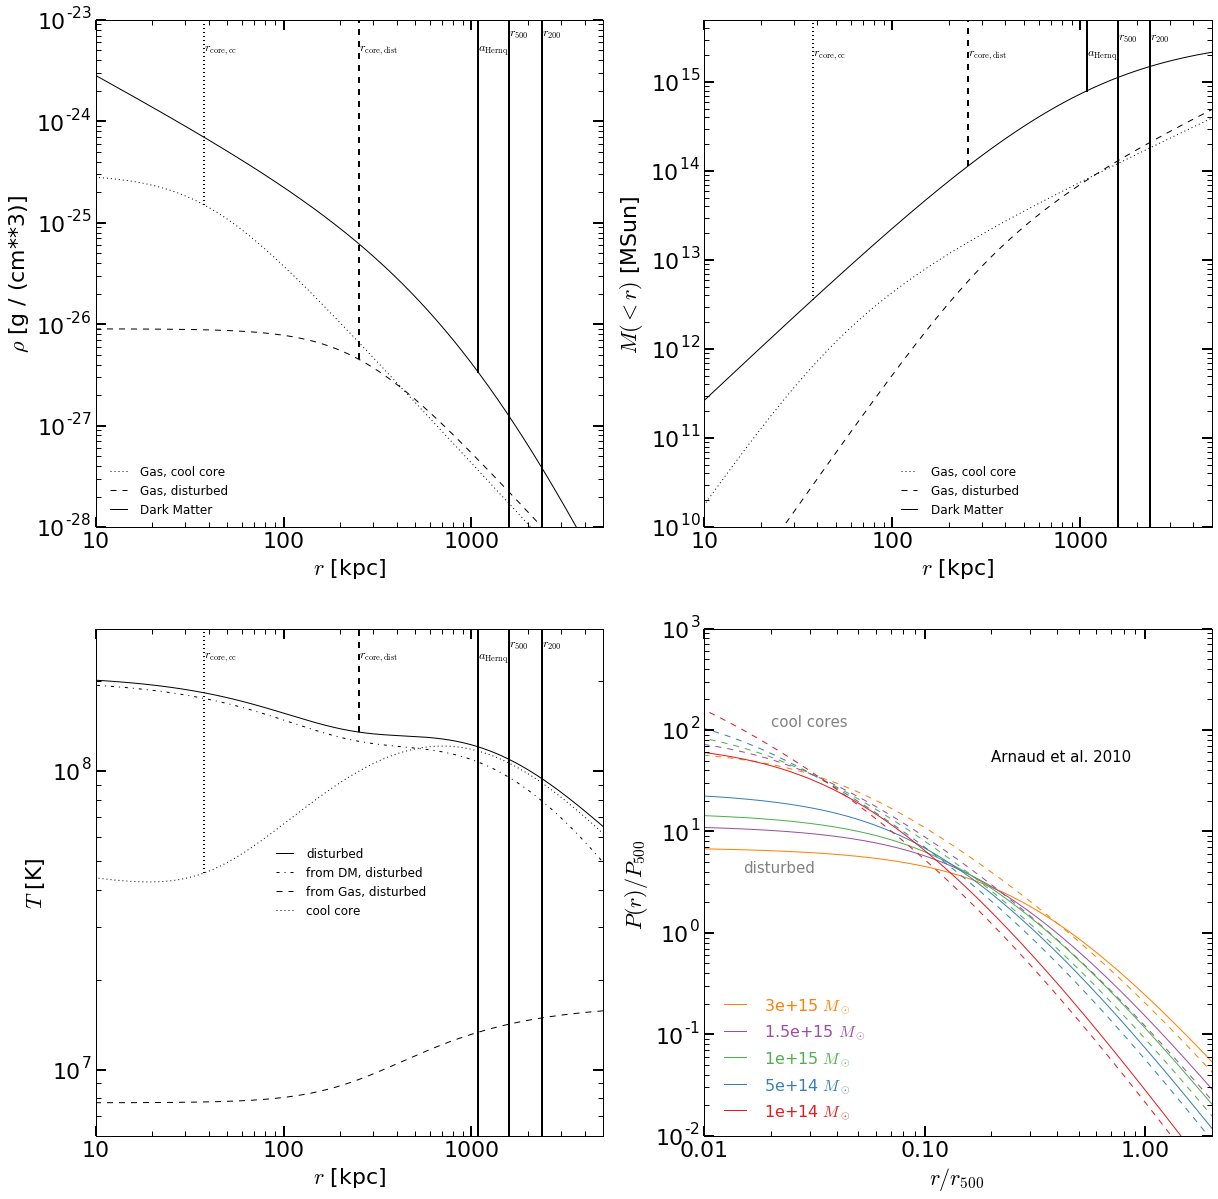

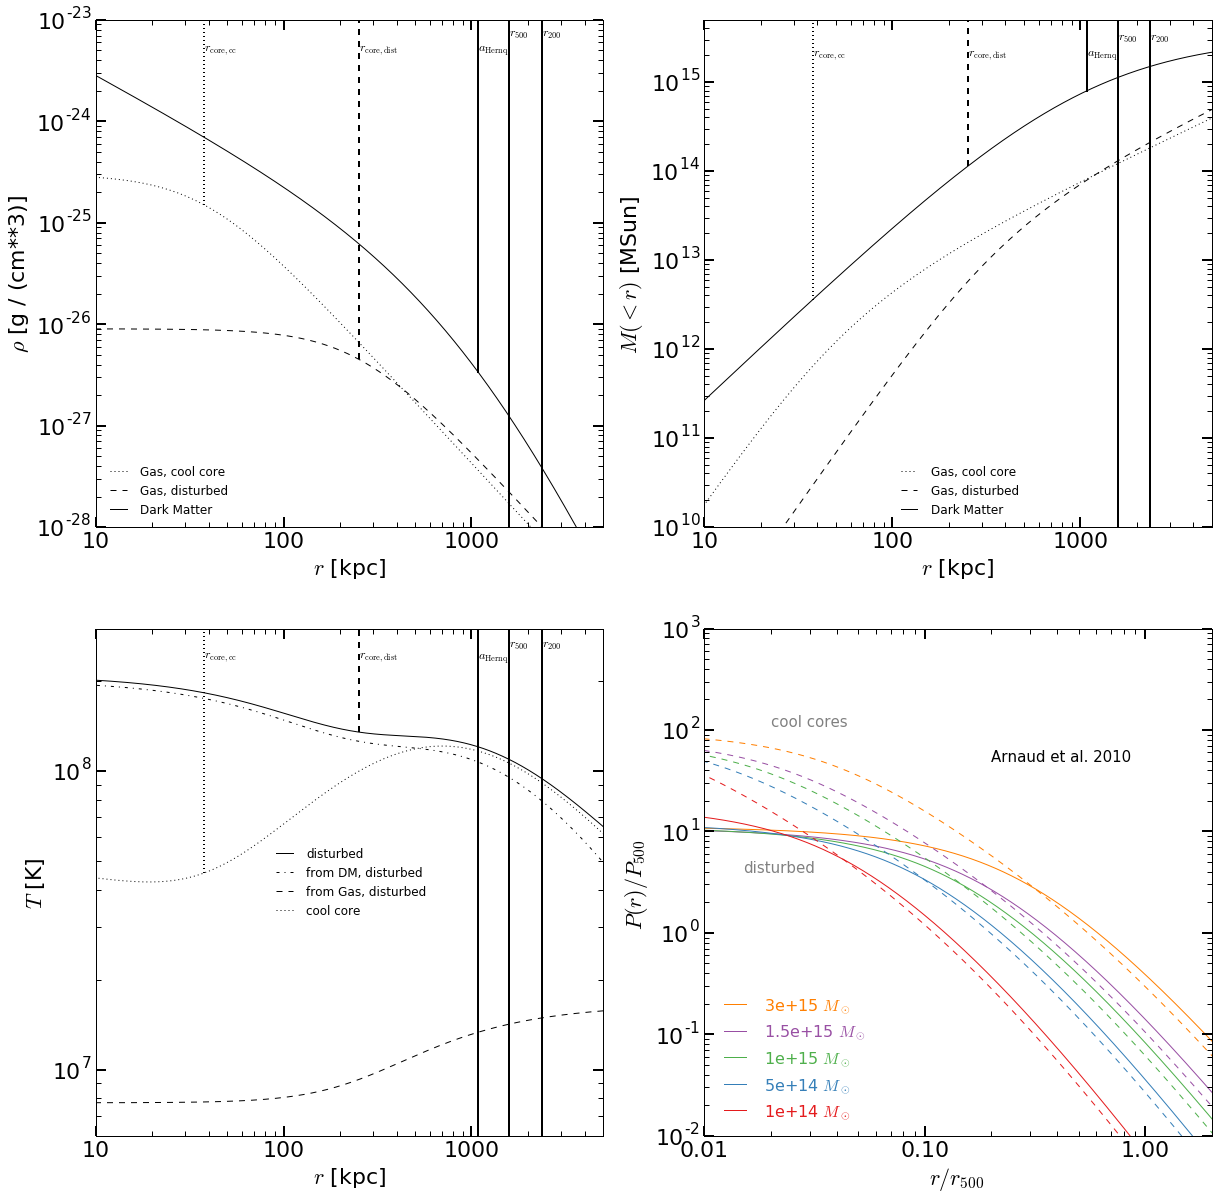

In [12]:
donnert_subplots()
donnert_subplots(analytical_P500=True)

In [13]:
def donnert_subplots_numerical(slow=False, analytical_P500=False):
    # Well, I will just eyeball the value of rho_0 in Figure 2 in Donnert (2014) and adopt this value, I suppose...
    disturbed = InitialCluster(rho_0=(9e-27 | units.g/units.cm**3), 
                               plot=False, do_print=False, 
                               disturbed_cluster=True, cool_core_cluster=False)

    fig, ((ax1, ax2), (ax3, ax4)) = pyplot.subplots(2, 2, figsize=(20, 20), dpi=500)
    thecolour = (152./255, 78./255, 163./255)
    # TODO: what is 2 h_sml? calculate it
    
    # Plot the density situation
    pyplot.sca(ax1)
    amuse_plot.scatter(
        amuse_nth_root((disturbed.gas.x**2+disturbed.gas.y**2+disturbed.gas.z**2), 2),
        disturbed.gas.density, label="Gas (simulation, 0 Gyr)", c="g", edgecolor="face")
    amuse_plot.loglog(disturbed.r, disturbed.rho_gas.as_quantity_in(units.g / units.cm**3),
                      c='k', ls='dashed', label="Gas (model)")
    amuse_plot.scatter(
        amuse_nth_root((disturbed.dm.x**2+disturbed.dm.y**2+disturbed.dm.z**2), 2),
        disturbed.dm.density, label="DM (simulation, 0 Gyr)", c="b", edgecolor="face")
    amuse_plot.loglog(disturbed.r, disturbed.rho_dm.as_quantity_in(units.g / units.cm**3),
                      c='k', ls='solid', label="DM (model)")
    amuse_plot.ylabel(r'$\rho$')
    amuse_plot.xlabel(r'$r$')
    pyplot.legend(loc=3, frameon=False, fontsize=12)
    
    ax1.set_ylim(ymin=1e-30, ymax=1e-22)

    pyplot.axvline(x=100, lw=2, ls=':', c='g')
    pyplot.text(100, 5e-23, r'$2 h_{\rm sml}$', color='g', fontsize=12)
    pyplot.axvline(x=disturbed.a.value_in(units.kpc), lw=2, c='k')
    pyplot.text(disturbed.a.value_in(units.kpc), 5e-23, r'$a_{\rm Hernq}$', fontsize=12)
    pyplot.axvline(x=disturbed.r_200.value_in(units.kpc), lw=2, ls='--', c='k')
    pyplot.text(disturbed.r_200.value_in(units.kpc), 5e-23, r'$r_{200}$', fontsize=12)

    # Plot the mass situation
    pyplot.sca(ax2)
    
    # TODO: this does not make sense because dm.mass and gas.mass have different r
    #amuse_plot.scatter(
    #    amuse_nth_root((disturbed.dm.x**2+disturbed.dm.y**2+disturbed.dm.z**2), 2),
    #    disturbed.dm.mass+disturbed.gas.mass, label="Gas + DM (sim 0 Gyr)", c=thecolour, edgecolor="face")
    amuse_plot.scatter(
        amuse_nth_root((disturbed.dm.x**2+disturbed.dm.y**2+disturbed.dm.z**2), 2),
        disturbed.dm.mass, label="DM (sim 0 Gyr)", c="b", edgecolor="face")
    amuse_plot.scatter(
        amuse_nth_root((disturbed.gas.x**2+disturbed.gas.y**2+disturbed.gas.z**2), 2),
        disturbed.gas.mass, label="Gas (sim 0 Gyr)", c="g", edgecolor="face")

    amuse_plot.loglog(disturbed.r, (disturbed.M_gas_below_r+disturbed.M_dm_below_r).as_quantity_in(units.MSun),
                      c='k', ls='dotted', label="Model Gas + DM")
    amuse_plot.loglog(disturbed.r, disturbed.M_gas_below_r.as_quantity_in(units.MSun),
                      c='k', ls='dashed', label="Model gas")
    amuse_plot.loglog(disturbed.r, disturbed.M_dm_below_r.as_quantity_in(units.MSun),
                      c='k', ls='solid', label="Model DM")
    amuse_plot.ylabel(r'$M(<r)$')
    amuse_plot.xlabel(r'$r$')
    pyplot.legend(loc=2, frameon=False, fontsize=12)
    
    ax2.set_ylim(ymin=1e10, ymax=5e15)

    pyplot.axvline(x=100, lw=2, ls=':', c='g')
    pyplot.text(100, 3e10, r'$2 h_{\rm sml}$', color='g', fontsize=12)
    pyplot.axvline(x=disturbed.a.value_in(units.kpc), lw=2, c='k')
    pyplot.text(disturbed.a.value_in(units.kpc), 3e10, r'$a_{\rm Hernq}$', fontsize=12)
    pyplot.axvline(x=disturbed.r_200.value_in(units.kpc), lw=2, ls='--', c='k')
    pyplot.text(disturbed.r_200.value_in(units.kpc), 3e10, r'$r_{200}$', fontsize=12)
    
    # Plot the temperature situation
    pyplot.sca(ax3)
    # TODO: set Rmax to 8.5 Mpc
    # rmax_8dot5Mpc = VectorQuantity.arange(units.kpc(1), units.Mpc(8.5), units.parsec(100))
    # amuse_plot.loglog(rmax_8dot5Mpc, disturbed.temperature(rmax_8dot5Mpc).as_quantity_in(units.K),
    #                  c='k', ls='dotted', label=r'Model, $r_{\rm max}$ = 8.5 Mpc')
    amuse_plot.loglog(disturbed.r, disturbed.T_r.as_quantity_in(units.K),
                      c='k', ls='solid', label=r'Model, $r_{\rm max} \rightarrow \infty$ Mpc')
    amuse_plot.ylabel(r'$T$')
    amuse_plot.xlabel(r'$r$')
    pyplot.legend(loc=3, frameon=False, fontsize=12)

    ax3.set_ylim(ymin=2e6, ymax=3e8)

    pyplot.axvline(x=100, lw=2, ls=':', c='g')
    pyplot.text(100, 2.6e8, r'$2 h_{\rm sml}$', color='g', fontsize=12)
    pyplot.axvline(x=disturbed.r_200.value_in(units.kpc), lw=2, c='k')
    pyplot.text(disturbed.r_200.value_in(units.kpc), 2.6e8, r'$r_{200}$', fontsize=12)

    # Plot the total density sityation   
    pyplot.sca(ax4)
    # TODO: this does not make sense because dm.mass and gas.mass have different r
    #amuse_plot.scatter(
    #    amuse_nth_root((disturbed.gas.x**2+disturbed.gas.y**2+disturbed.gas.z**2), 2),
    #    disturbed.gas.density+disturbed.dm.density, label="Simulation (0 Gyr)", c=thecolour, edgecolor="face")
    amuse_plot.loglog(disturbed.r, (disturbed.rho_gas+disturbed.rho_dm).as_quantity_in(units.g / units.cm**3),
                      c='k', ls='dashed', label="Model")
    
    ax1.set_ylim(ymin=1e-30, ymax=1e-22)

    amuse_plot.ylabel(r'$<\rho_{\rm tot} (<r)>$')
    amuse_plot.xlabel(r'$r$')
    legend = pyplot.legend(loc=3, frameon=False, fontsize=16)
    
    ax4.set_ylim(ymin=1e-28, ymax=1e-22)
    
    pyplot.axvline(x=100, lw=2, ls=':', c='g')
    pyplot.text(100, 5e-23, r'$2 h_{\rm sml}$', color='g', fontsize=12)
    pyplot.axvline(x=disturbed.a.value_in(units.kpc), lw=2, c='k')
    pyplot.text(disturbed.a.value_in(units.kpc), 5e-23, r'$a_{\rm Hernq}$', fontsize=12)
    pyplot.axvline(x=disturbed.r_200.value_in(units.kpc), lw=2, ls='--', c='k')
    pyplot.text(disturbed.r_200.value_in(units.kpc), 5e-23, r'$r_{200}$', fontsize=12)

    # Set the xticks situation
    for ax in [ax1, ax2, ax3]:
        ax.set_xticks((1, 10, 100, 1000, 10000))
        ax.set_xticklabels(("1", "10", "100", "1000", "10000"))
        ax.set_xlim(xmin=1, xmax=10000)
        ax.minorticks_on()
        ax.tick_params('both', length=10, width=2, which='major')
        ax.tick_params('both', length=5, width=1, which='minor')
        ax.axvspan(5000, 10000, color='grey', alpha=0.2, lw=0)
        
    pyplot.savefig("Donnert2014_Figure2_by_TLRH.pdf", format="pdf", dpi=1000)

Initialising cluster with Ngas=5000, Ndm=5000


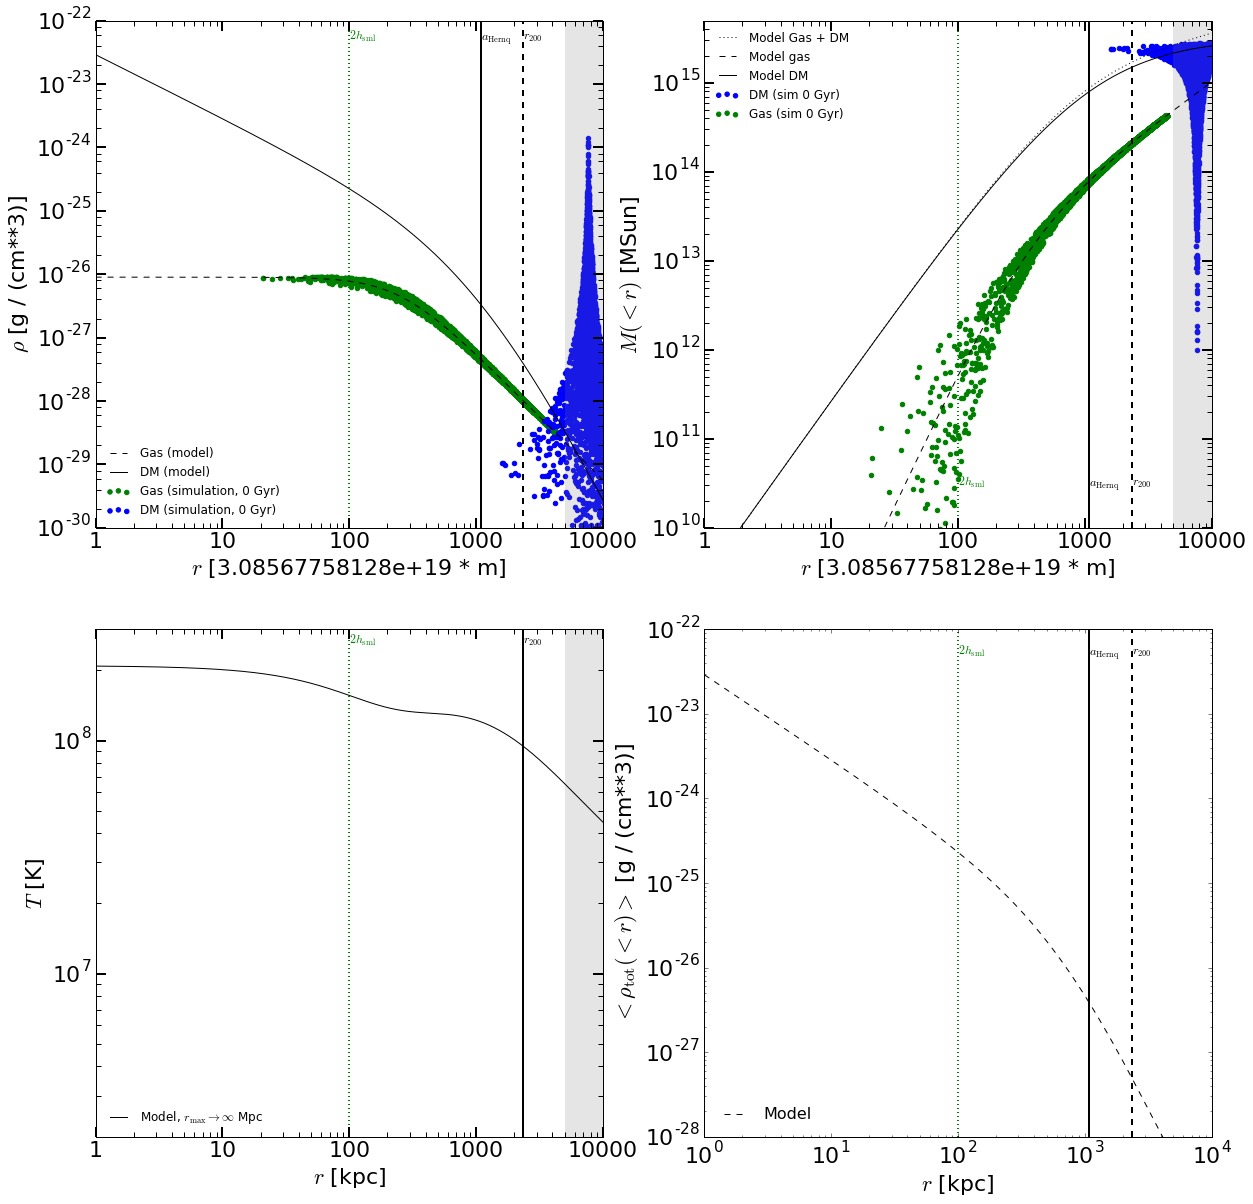

In [14]:
donnert_subplots_numerical()

In [15]:
tstart = time.time()
donnert_subplots()
print "Runtime: {0} seconds".format((time.time() - tstart))

tstart = time.time()
donnert_subplots(True)
print "Runtime: {0} seconds".format((time.time() - tstart))

NameError: name 'time' is not defined

In [ ]:
# Check that analytic formula of T_c is the same as T_c = T(r_c)
ClusterA.print_characteristic_value("T_r", "r_c")
print "{0:.3e} K".format(ClusterA.T_c.value_in(units.K))

In [ ]:
print ClusterA.P_500
print ClusterA.P[0:10].as_quantity_in(units.Pa)

In [ ]:
#P = kTrho/m
print constants.kB*ClusterA.T_r[0:10].as_quantity_in(units.K)
print
print ClusterA.rho_dm[0:10].as_quantity_in(units.g/units.cm**3)
print ClusterA.rho_gas[0:10].as_quantity_in(units.g/units.cm**3)

In [ ]:
P = (constants.kB*ClusterA.T_r*ClusterA.rho_gas/ClusterA.M_dm_below_r)

In [ ]:
amuse_plot.loglog(ClusterA.r/ClusterA.r_500, P/ClusterA.P_500)

In [ ]:
amuse_plot.loglog(ClusterA.r, ClusterA.P_gas)

In [ ]:
amuse_plot.plot(ClusterA.r, ClusterA.M_dm_below_r, c=(197./255, 155./255, 203./255))

In [ ]:
amuse_plot.loglog(ClusterA.r, ClusterA.dm_pressure(ClusterA.r))

In [ ]:
from scipy.optimize import fsolve
import time

tstart = time.time()
r_500 = ClusterA.r[(numpy.abs(ClusterA.rho_dm_avg-500*ClusterA.rho_crit)).argmin()]
print r_500.value_in(units.kpc)
print "Runtime: {0} seconds".format((time.time() - tstart))

tstart = time.time()
r_500 = fsolve(lambda r: ClusterA.average_dm_density(r | units.kpc).value_in(units.g/units.cm**3) 
    - (500*ClusterA.rho_crit).value_in(units.g/units.cm**3), 1) 
print r_500[0]
print "Runtime: {0} seconds".format((time.time() - tstart))


In [ ]:
print(numpy.random.uniform(0, 1, 10))

https://en.wikipedia.org/wiki/Rejection_sampling
# Algorithm

The algorithm (used by John von Neumann and dating back to Buffon and his needle) to obtain a sample from distribution $X$ with density $f(x)$ using samples from distribution $Y$ with density $g(x)$ is as follows:
- Obtain a sample $y$ from distribution $Y$ and a sample u from $U(0,1)$ (the uniform distribution over the unit interval).
- Check whether or not $u<f(x)/Mg(x)$.
     - If this holds, accept x as a realization of $f(x)$;
     - if not, reject the value of x and return to the sampling step.

The algorithm will take an average of $M$ iterations to obtain a sample.

% TODO: hack the plummer.py code built-in AMUSE, then sent clone AMUSE, add code and sent pull request?

In [ ]:
"""
Galaxy cluster generator

This module contains a function used to create initial conditions for 
clusters of galaxies with DM following a Hernquist (1990) model, which 
follows a spherically symmetric density profile of the form:
rho = M_dm/(2*pi) * a*(r + a)**(-3), where a is the Hernquist scale radius and M_dm the total DM mass.

The baryonic matter consists of intracluster gas only (no stars/galaxies, and cooling is ignored)
following a beta-model (Cavaliere & Fusco-Femiano 1978) with beta = 2/3 (Mastropietro & Burkert (2008)),
which follows a spherically symmetric density profile of the form:
rho = rho_0 * (1 + r**2/r_c**2)**(-3/2 * beta), where r_c is the core radius.
"""

import numpy
import numpy.random

from amuse.units import nbody_system
from amuse import datamodel

__all__ = ["new_galaxy_cluster"]

class MakeGalaxyCluster(object):
    def __init__(self, number_of_particles, random_state=None, random=None):
        self.number_of_gas_particles = int(0.5*number_of_particles)
        self.number_of_dm_particles = int(0.5*number_of_particles)
        
        # For now do this separately because otherwise I will get lost in the vast number of lines
        self.cluster = InitialCluster(do_print=False, plot=False)
        
        if not random_state == None:
            print "DO NOT USE RANDOM STATE"
        
        self.random_state = None
        
        if random is None:
            self.random = numpy.random
        else:
            self.random = random
            
        print "Initialising cluster with Ngas={0}, Ndm={1}"\
            .format(self.number_of_gas_particles, self.number_of_dm_particles)

    def calculate_radius_uniform_distribution(self, gas_or_dm):
        """" Sample radius from the mass profile M(r) """
        if gas_or_dm == "dm":
            # The Hernquist profile is easily invertible, so the mass profile can be sampled via
            # q = M_dm_below_r/M_dm => r = a*sqrt(q)/(1-sqrt(q)), for random q: 0 <= q <= 1
            q = self.random.uniform(0, 1, self.number_of_dm_particles)
            radius = self.cluster.a*numpy.sqrt(q) / (1 - numpy.sqrt(q))
            amuse_plot.hist(numpy.log(radius.value_in(units.Mpc)), bins=int(numpy.sqrt(self.number_of_dm_particles)))
            pyplot.show()
            return radius
        elif gas_or_dm == "gas":
            # The mass profile for the gas is not easily invertible, so sample the gas
            # mass by numerically inverting it trough a table.
            # self.cluster.M_gas_below_r ?
            # self.cluster.gas_cummulative_mass(r)
            #  //  Choose radius randomly from the mass distribution.
            # rno = self.random.uniform(0, 1, (self.number_of_gas_particles, 1))
            radius = None
            return radius
        else:
            print "Incorrect usage of calculate_radius_uniform_distribution."
            print "Please specify gas_or_dm = 'gas' or 'dm'."
            return None

    def new_positions_spherical_coordinates(self, gas_or_dm=None):
        if gas_or_dm == "dm":
            number_of_particles = self.number_of_dm_particles
        elif gas_or_dm == "gas":
            number_of_particles = self.number_of_gas_particles
        else:
            print "Incorrect usage of new_positions_spherical_coordinates."
            print "Please specify gas_or_dm = 'gas' or 'dm'."
            return None
        pi2 = numpy.pi * 2
        radius = self.calculate_radius_uniform_distribution(gas_or_dm)
        theta = numpy.arccos(self.random.uniform(-1.0, 1.0, number_of_particles))
        phi = self.random.uniform(0.0, pi2, number_of_particles)
        return (radius,theta,phi)

    def coordinates_from_spherical(self, radius, theta, phi):
        x = radius * numpy.sin( theta ) * numpy.cos( phi )
        y = radius * numpy.sin( theta ) * numpy.sin( phi )
        z = radius * numpy.cos( theta )
        return (x,y,z)

    @property
    def result(self):
        print "Running result function"
        
        # Set up Dark Matter Sphere
        dm_masses = numpy.ones(self.number_of_dm_particles) / self.number_of_dm_particles
        print "dm_mass per particle =", dm_masses[0]
        radius, theta, phi = self.new_positions_spherical_coordinates(gas_or_dm="dm")
        x, y, z = self.coordinates_from_spherical(radius, theta, phi)
        amuse_plot.scatter(x.as_quantity_in(units.Mpc), y.as_quantity_in(units.Mpc), edgecolor='face')
        
        dm_result = datamodel.Particles(self.number_of_dm_particles)
        dm_result.mass = nbody_system.mass.new_quantity(dm_masses)
        print dm_masses.shape
        print x.shape
        # dm_result.x = nbody_system.length.new_quantity(x)
        # dm_result.y = nbody_system.length.new_quantity(y)
        #dm_result.z = nbody_system.length.new_quantity(z.reshape(self.number_of_dm_particles))
        #dm_result.vx = nbody_system.speed.new_quantity(vx.reshape(self.number_of_particles) / sqrt(1/1.695))
        #dm_result.vy = nbody_system.speed.new_quantity(vy.reshape(self.number_of_particles) / sqrt(1/1.695))
        #dm_result.vz = nbody_system.speed.new_quantity(vz.reshape(self.number_of_particles) / sqrt(1/1.695))
        # dm_result.radius = 0 | nbody_system.length
        
        print dm_result

        # set up Gas Sphere
        gas_result = datamodel.Particles(self.number_of_gas_particles)
        # gas_mass = 
        
        # Take Superset of particlesets ?
        # result = ParticlesSuperset([gas_result, dm_result])
        return dm_result, gas_result

def new_galaxy_cluster(number_of_particles, *list_arguments, **keyword_arguments):
    """
    Create the initial conditions for a cluster of galaxies with the given number of particles
    equally split over the dark matter and the baryonic matter (gas) spheres. Returns
    a set of dm_particles and gas_particles with equal mass, and positions and velocities distributed
    to fit a Hernquist (1990) for DM and beta model (Cavaliere & Fusco-Femiano 1978) for the gas.
    The model is centered around the origin. 
    (TODO: ?Positions and velocities are optionally scaled such that the kinetic and
    potential energies are 0.25 and -0.5 in nbody-units, respectively.?)
    :argument number_of_particles: Number of particles to include in the cluster sphere
    :argument convert_nbody:  When given will convert the resulting set to SI units
    :argument radius_cutoff: Cutoff value for the radius (defaults to 22.8042468)
    :argument mass_cutoff: Mass percentage inside radius of 1
    :argument do_scale: scale the result to exact nbody units (M=1, K=0.25, U=-0.5)
    """
    uc = MakeGalaxyCluster(number_of_particles, *list_arguments, **keyword_arguments)   
    return uc.result

mycluster = new_galaxy_cluster(1000)

In [ ]:
hank = VectorQuantity.arange(1 | units.kpc, 10 | units.kpc, 1 | units.parsec)
numpy.log(hank.value_in(units.kpc))

In [ ]:
from ipywidgets import interact, FloatSlider
elevation_slider = FloatSlider(min=10.0, max=60.0, step=(60.0-10.0)/36, value=30.0)
azimuth_slider = FloatSlider(min=0.0, max=360.0, step=360.0/36, value=359.0)
distance_slider = FloatSlider(min=7.0, max=10.0, step=(10.0-7.0)/36, value=8.5)

#@interact(elevation=elevation_slider, azimuth=azimuth_slider, distance=distance_slider)
def plot_3d(elevation=1.0, azimuth=1.0, distance=1.0):
    from mpl_toolkits.mplot3d import Axes3D
    
    cluster = InitialCluster(do_print=False, plot=False, number_of_particles=1e5)
    
    fig = pyplot.figure(figsize=(10, 5))
    #canvas = FigureCanvas(-1, fig) #You must set up the canvas before creating the 3D axes self.axes = Axes3D(self.figure) # ...

    ax_dm = fig.add_subplot(121, aspect='equal', projection='3d')
    ax_dm.mouse_init() 
    ax_gas = fig.add_subplot(122, aspect='equal', projection='3d',
        sharex=ax_dm, sharey=ax_dm)
    ax_gas.mouse_init() 
    
    print type(ax_dm)
    print type(ax_gas)

    # plot dark matter
    center_of_mass = cluster.dm.center_of_mass()
    virial_radius = cluster.dm.virial_radius().as_quantity_in(units.kpc)
    innersphere = cluster.dm.select(lambda r: (center_of_mass-r).length()<virial_radius,["position"])
    outersphere = cluster.dm.select(lambda r: (center_of_mass-r).length()>= virial_radius,["position"])
    pyplot.gcf().sca(ax_dm)
    x = outersphere.x.as_quantity_in(units.kpc)
    y = outersphere.y.as_quantity_in(units.kpc)
    z = outersphere.z.as_quantity_in(units.kpc)
    amuse_plot.plot(x, y, z, 'o', c='red', label=r'$r \geq r_{\rm vir}$')
    x = innersphere.x.as_quantity_in(units.kpc)
    y = innersphere.y.as_quantity_in(units.kpc)
    z = innersphere.z.as_quantity_in(units.kpc)
    amuse_plot.plot(x, y, z, 'o', c='green', label=r'$r < r_{\rm vir}$')
    amuse_plot.xlabel(r'$x$')
    amuse_plot.ylabel(r'$y$')
    ax_dm.set_zlabel(r'$z$ [{0}]'.format(virial_radius.unit))
    
    #ax_dm.azim = azimuth
    #ax_dm.elev = elevation #elev_range[int(azimuth/(360./steps))]
    #ax_dm.dist = distance #dist_range[int(azimuth/(360./steps))]
    
    print cluster.r_500
    ax_dm.set_xlim3d(-1.0*cluster.r_500.number, cluster.r_500.number)
    ax_dm.set_ylim3d(-1.0*cluster.r_500.number, cluster.r_500.number)
    ax_dm.set_zlim3d(-1.0*cluster.r_500.number, cluster.r_500.number)
    # pyplot.legend()

    # plot gas as sph plot
    # Adjusted code from amuse.plot.sph_particles_plot
#     pyplot.gcf().sca(ax_gas)
#     min_size = 100
#     max_size = 10000
#     alpha = 0.1
#     x = cluster.gas.x.as_quantity_in(units.kpc)
#     y = cluster.gas.y.as_quantity_in(units.kpc)
#     z = cluster.gas.z.as_quantity_in(units.kpc)

#     ax_gas.scatter(x.number, y.number, z.number, color=colors, s=sizes, edgecolors="none", alpha=alpha)
#     ax_gas.scatter(x.number, y.number, z.number)
#     amuse_plot.xlabel(r'$x$')
#     amuse_plot.ylabel(r'$y$')
#     ax_gas.set_zlabel(r'$z$ [{0}]'.format(virial_radius.unit))

#     amuse_plot.xlim(-2.*virial_radius, 2*virial_radius)
#     amuse_plot.ylim(-2.*virial_radius, 2*virial_radius)
#     ax_dm.set_zlim(-2.*virial_radius.number, 2*virial_radius.number)
#     ax_gas.set_zlim(-2.*virial_radius.number, 2*virial_radius.number)
#    fig.suptitle('elev=' + str(round(ax.elev,1)) + ', azim=' + str(round(ax.azim,1)) + ', dist=' + str(round(ax.dist,1)))
    pyplot.tight_layout()
    pyplot.draw()


plot_3d()

In [ ]:
#import mpl_toolkits
# help(mpl_toolkits.mplot3d.Axes3D)

In [ ]:
# In terminal: ipcluster start -n 4  
# Parallel *_*
from ipyparallel import Client, interactive
rc = Client()
print rc.ids
dv = rc[:]

In [ ]:
%px import numpy as np

In [ ]:
for i, r in enumerate(rc):
    r.execute('np.random.seed(123)')

In [ ]:
%%px

np.random.random(3)

In [ ]:
dv.scatter('seed', [1,1,2,2], block=True)


In [ ]:
dv['seed']

In [ ]:
%%px

np.random.seed(seed)
np.random.random(3)

In [ ]:
for i, r in enumerate(rc):
    r.execute('np.random.seed(%d)' % i)

In [ ]:
%%px

np.random.random(3)

In [ ]:
%%px

x = np.random.random(3)

In [ ]:
dv['x']

In [ ]:
dv.gather('x', block=True)

In [ ]:
%%px
n = int(1e7)
x = np.random.uniform(-1, 1, (n, 2))
n = (x[:, 0]**2 + x[:,1]**2 < 1).sum()

In [ ]:
import numpy as np
%precision 8
ns = dv['n']
4*np.sum(ns)/(1e7*len(rc))

In [11]:
from amuse.units import units
timestep = 372706005571.0 | units.s
print (1.08 * timestep).as_quantity_in(units.Myr) / units.Myr(25) * 100

0.0510217612575


0.00118105928837 Myr
